# Lezione 1 - esercitazione 3

# 1. creazione GRIGLIA:
obiettivo di ottenere una griglia con interfacce rosse (superficiali e sottostrati); linea sup e in fondo sono quelle su cui si applicano le c. al fondo
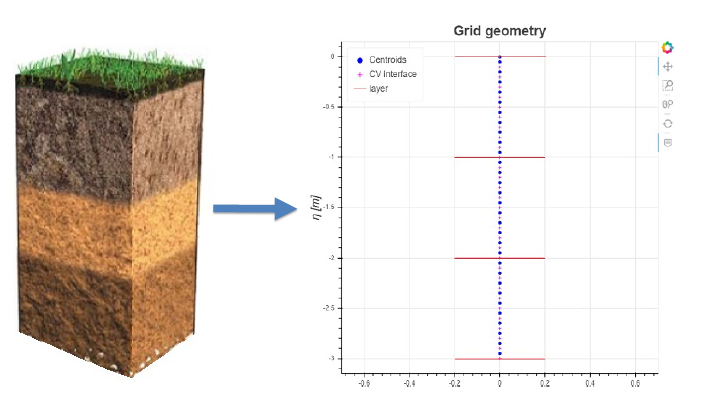

l'idea per la soluzione di R è di risolvere l'equaionzione in forma discreta, i punti su cui andiamo a risolvere le eq sono i pti blu

il risultato: volumi di controllo in cui il punto rappresentativo della soluzione separato dagli altri con le croci viola sono interfacce dei v di controllo.

**1. hp: stratigrafia**
come è fatta stratigrafia è l'ipotesi da fare:
- nel caso di diversi layer (profondità, tipo di suolo).
- tipo di suolo ci riferiamo ai parametri delle curve di ritenzione idrica
- c. iniziale da cui far evolvere la simulaizone al tempo zero: profilo di suzione a cui corrisponde profilo di contenuto d'acqua: tale fotografia suolo all'istante 0. c. iniziale è arbitraria: **all'inizio conviene avere una c. idrostatica** per sapere che quello che succcede nel suolo si attribuire solamente alle c al contorno. se arbitrarie: l'acqua si muove oltre per effetto delle c al contorno (in sup e al fondo) anche per i gradienti di suzione.


Ci interessano i punti blu (centroide) su cui facciamo l'elaborazione.

i file di input da preparare per la griglia:
- file csv per geometria colonna di suolo (profondità e profondità strati) 
- file csv per c. iniziale (per punti)
- file csv in cui si inseriscono i param della curva di ritenzione idrica (V-G;BC,...) dizionario -> file in cui si possono inserire più set di parametri da cui pescare per avere proprietà della colonna

## grid_input_file_name.csv
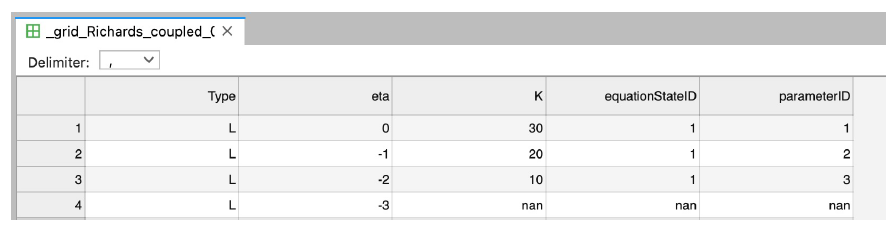

### **L=Layer**
* diverse colonne, la prima type si usa per specificare il Layer (L) - sono le righe rosse nella griglia; 
    - abbiamo 4 layer, nella prima riga $\eta$ = coordinata positiva verso alto e 0 == superficie del suolo; di conseguenza nella colonna sono negative
    - secondo layer a 1 m
    - terzo a 2m
    - colonna si chiude a 3m == si definisce con $\eta$ la profondità della colonna

### **M** 
per inserire delle righe dei punti di misura; per misure in campo e vogliamo calcolare la suzione in quel punto. volendo la colonna type è stata definita per poter inserire unnità di misura. Oltre ai nostri scopy

### **K**: numero di punti in cui vogliamo iscretizzare ciascun layer
quando si crea la griglia non si può avere la stessa densità di punti: di solito in generale si aumenta il numero di punti in superficie e si riduce il numero di punti andando in prodondità.

Per i vari layer a partire dall'alto ci sono: 30 punti; 20 pti; 10 pti: quando si crea la griglia non si vuole avere con la stessa densità di punti. più interessante aveer più punti in prossimità della superficie e diminuire la densità verso il fondo (minor costo computazionale).

### Colonna parameterID: per assegnare ad ogni layer il set di parametri 
assegnamo un numero == corrisponde a un set/riga nel file csv del parametro.
*Esempio file Richards_VG*: il # per inserire commenti nel file; il primo layer ha parameterID = 1: stiamo usando il set di parametri sotto il commento n.1.
il vantaggio è che possiamo aggiungere tutti i set di parametri diversi e poi nel file csv della griglia possiamo richiamare l'ID di parametri che ci interessa a noi.


## ic_input_file_name.csv
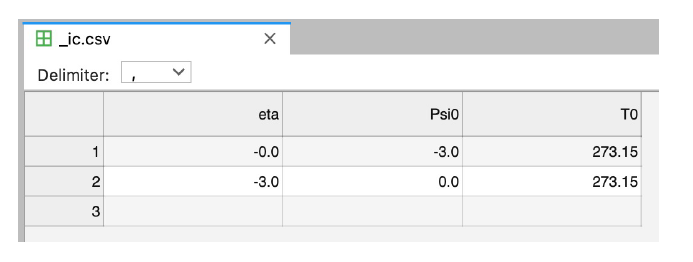
altro file csv: relativo alla **c iniziale**: viene assegnata per punti (coordinata $\eta$ che identifica il punto alla cui profondità si assegna un valore di $\psi_0$ e temperatura (interessa eventualmente per far dipendere conducibilità idraulica anche a T).
Si definiscono i punti a una certa profondità a cui si vogliono assegnare valori di suzione.

in questo caso la suzione: tipo idrostatico nel layer 1; al fondo suzione pari a 0 (come se ci fosse un'interfaccia tra zona satura e insatura della colonna di suolo). In superficie: suzione pari a 3.0 --> salendo di 3m la suzione decresce di altrettando.
Uno script python partendo questi due valori, interpola una retta e assegna a ciascun gruppo della griglia un valore di suzione-

## parameter_input_file_name.csv
**SWRC**: consentono di modellare le p idrauliche nel suolo:
- van g
- brooks.C
- kosugi
- romano: generalizzazione di Kosugi (unimodale) somma di due unimodali 

per ognuna di queste dobbiamo assegnare un file dei parametri

Abbiamo una tabella con i parametri:
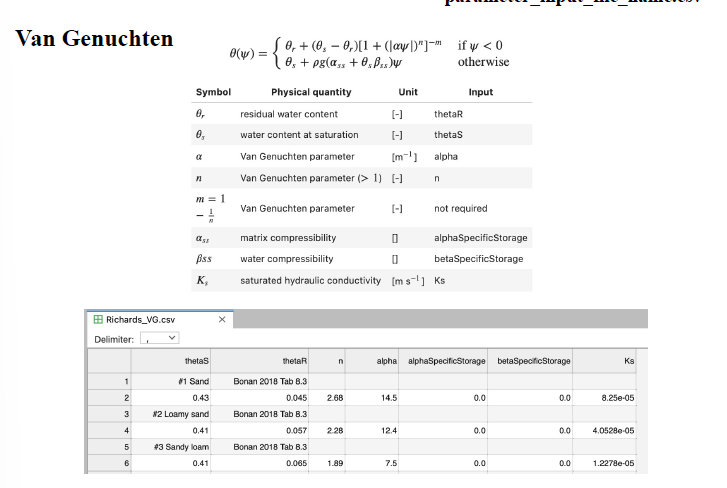

il parametro $\alpha [m^{-1}]$ in alcuni casi bisogna fare conversione da cm

nel caso di m: hp calcolato a partire dal valore di n quindi non deve essere definito dall'utente

$\alpha_{ss}$ e $\beta_{ss}$ specific storage: consentono di estendere nel dominio saturo la SWRC; nell'insaturo abbiamo la prima equazione del sistema mentre nel modello saturo contenuto d'acqua costante. Viene modificata aggiungendo un termine che tiene conto che quando si è a saturazione acqua e matrice solida soprattutto mezzi elasticin (acqua meno) così il contenuto d'acqua cambi leggermente man mano che aumenta la preessione dell'acqua

Ci sono file csv specifici per ogni parametrizzazione proprio perchè i parametri sono diversi per ognuna. quella di romano è generalizzazione: Kosugi è unimodale (descrizione pori) mentre R è ottenuta dalla somma di due curve unimodali.


preparati i file CSV: run tthe notebook $$WHETGEO1D_RichardsCoupled_Computational_grid.ipynb$$ consente di processare queste info per ottenere una griglia di calcolo.


*RIPASSO TEORIA*

Richards: sistema di tre equazioni; la prima consiste nel **bilancio di massa: SWRC + Darcy Buckingham**:

\begin{equation}
C(\phi)\cdot\frac{\delta(\phi)}{\delta(z)}=K*\frac{\delta(\phi + z)}{\delta(z)}
\end{equation}
misuro flusso con K maggiore tra i due volumi di controllo

la seconda equazione è la parametrizzazione di Maulem e la terza è la parametrizzazione di VG.